In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [29]:
# Read csv file
cases = pd.read_csv('../STA 141C/Cases_Subset.csv', sep = ",", dtype = "str")

In [30]:
# Drop extra columns
cases = cases.drop(cases.columns[range(20,47)], axis = 1)

# Date Columns
date_columns = ["Opened", "Closed", "Updated"]

# Convert specified columns into datetime format
cases[date_columns] = cases[date_columns].apply(pd.to_datetime, format = "%m/%d/%Y %I:%M:%S %p")

# Find Closed - Opened
time_elapsed = (cases["Closed"] - cases["Opened"])

# Insert Time Elapsed into cases df
cases.insert(3, "Time Elapsed", time_elapsed)

In [31]:
cases

,CaseID,Opened,Closed,Time Elapsed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,...,Address,Street,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL
0,10622276,2019-03-19 16:44:32,NaT,NaT,2020-08-28 01:31:06,Open,accepted,DPW BSM Queue,Sidewalk or Curb,Sidewalk_Defect,...,"361 MISSISSIPPI ST, SAN FRANCISCO, CA, 94107",MISSISSIPPI ST,10,Potrero Hill,BAYVIEW,37.76156,-122.394172,"(37.76156, -122.394172)",Web,NaN
1,10704816,2019-04-09 07:08:53,NaT,NaT,2020-08-28 01:31:03,Open,accepted,DPW BSM Queue,Sidewalk or Curb,Sidewalk_Defect,...,"1407 GOUGH ST, SAN FRANCISCO, CA, 94109",GOUGH ST,5,Cathedral Hill,NORTHERN,37.786767,-122.425109,"(37.786767, -122.425109)",Mobile/Open311,NaN
2,10892486,2019-05-21 16:11:00,2020-08-28 07:46:00,464 days 15:35:00,2020-08-28 07:46:00,Closed,Case Resolved - Loose PG&E vault doors and sun...,DPW BSM Queue,Sidewalk or Curb,Sidewalk_Defect,...,Intersection of CARL ST and COLE ST,CARL ST,5,Cole Valley,PARK,37.765800476074,-122.44995880127,"(37.76580048, -122.4499588)",Phone,NaN
3,11866528,2019-12-27 12:09:00,2020-01-08 21:30:13,12 days 09:21:13,2020-01-08 21:30:13,Closed,Case Resolved - Per process - cases are closed...,Clear Channel - Transit Queue,Street and Sidewalk Cleaning,Transit_shelter_platform,...,Intersection of MARKET ST and DRUMM ST,MARKET ST,3,Financial District,CENTRAL,37.793254852295,-122.396301269531,"(37.79325485, -122.39630127)",Phone,NaN
4,10650674,2019-03-26 20:26:28,NaT,NaT,2020-07-15 01:25:53,Open,accepted,DPW - Bureau of Street Use and Mapping - G,General Request - PUBLIC WORKS,request_for_service,...,"868 FOLSOM ST, SAN FRANCISCO, CA, 94107",FOLSOM ST,6,South of Market,SOUTHERN,37.780902862549,-122.402801513672,"(37.78090286, -122.40280151)",Integrated Agency,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,12830862,2020-08-28 10:18:47,NaT,NaT,2020-08-28 10:22:30,Open,accepted,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,...,"2954 SAN BRUNO AVE, SAN FRANCISCO, CA, 94134",SAN BRUNO AVE,9,Portola,BAYVIEW,37.724585998839,-122.402304718385,"(37.724586, -122.40230472)",Mobile/Open311,http://mobile311.sfgov.org/reports/12830862/ph...
1996,12830873,2020-08-28 10:20:00,2020-08-28 11:12:06,0 days 00:52:06,2020-08-28 11:12:06,Closed,Case Resolved - Police Officer responded to re...,Parking Enforcement Dispatch Queue,Parking Enforcement,Blocking_Driveway_Cite_Only,...,"1618 GUERRERO ST, SAN FRANCISCO, CA, 94110",GUERRERO ST,8,Noe Valley,INGLESIDE,37.7452269,-122.42241283,"(37.7452269, -122.42241283)",Phone,NaN
1997,12311701,2020-04-10 16:00:00,2020-04-11 14:33:28,0 days 22:33:28,2020-04-11 14:33:28,Closed,Case is a Duplicate - Due to the implementati...,DPW Ops Queue,Tree Maintenance,Trees - Overgrown_Tree,...,"718 10TH AVE, SAN FRANCISCO, CA, 94118",10TH AVE,1,Inner Richmond,RICHMOND,37.774753570557,-122.467971801758,"(37.77475357, -122.4679718)",Phone,NaN
1998,12830876,2020-08-28 10:21:00,2020-08-28 11:07:43,0 days 00:46:43,2020-08-28 11:07:43,Closed,Case Resolved - Officer responded to request u...,Parking Enforcement Dispatch Queue,Parking Enforcement,Blocking_Driveway_Cite_Only,...,"1470 GOLDEN GATE AVE, SAN FRANCISCO, CA, 94115",GOLDEN GATE AVE,5,Western Addition,NORTHERN,37.7794012,-122.4347523,"(37.7794012, -122.4347523)",Web,http://mobile311.sfgov.org/reports/12830876/ph...


In [138]:
# Question 3: given the request type, what is the predicted time of day

# subset data
cases_q3 = cases.drop(['Request Details','Media URL','CaseID','Closed','Time Elapsed','Updated',
                       'Status Notes','Point','Address'], axis=1)

In [139]:
# separate by day and night 
# day = 0; night = 1
cases_q3 = cases_q3.set_index(pd.to_datetime(cases_q3['Opened']))
cases_q3["day_night"] = 1

In [140]:
cases_q3.loc[cases_q3.between_time("06:00", "18:00").index, "day_night"] = 0

In [141]:
cases_q3["day_night"].value_counts()

0    1527
1     473
Name: day_night, dtype: int64

In [147]:
status = pd.get_dummies(cases_q3['Status'],drop_first=True)
category = pd.get_dummies(cases_q3['Category'],drop_first=True)
request = pd.get_dummies(cases_q3['Request Type'],drop_first=True)
agency = pd.get_dummies(cases_q3['Responsible Agency'],drop_first=True)
street = pd.get_dummies(cases_q3['Street'],drop_first=True)
supervisor = pd.get_dummies(cases_q3['Supervisor District'],drop_first=True)
neighbor = pd.get_dummies(cases_q3['Neighborhood'],drop_first=True)
police = pd.get_dummies(cases_q3['Police District'],drop_first=True)
source = pd.get_dummies(cases_q3['Source'],drop_first=True)

In [148]:
cases_q3 = pd.concat([cases_q3,status,category,request,agency,street,supervisor,neighbor,police,source],axis=1)

In [151]:
cases_q3

,Opened,Status,Responsible Agency,Category,Request Type,Street,Supervisor District,Neighborhood,Police District,Latitude,...,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,Mobile/Open311,Other Department,Phone,Twitter,Web
Opened,,,,,,,,,,,,,,,,,,,,,
2019-03-19 16:44:32,2019-03-19 16:44:32,Open,DPW BSM Queue,Sidewalk or Curb,Sidewalk_Defect,MISSISSIPPI ST,10,Potrero Hill,BAYVIEW,37.76156,...,0,0,0,0,0,0,0,0,0,1
2019-04-09 07:08:53,2019-04-09 07:08:53,Open,DPW BSM Queue,Sidewalk or Curb,Sidewalk_Defect,GOUGH ST,5,Cathedral Hill,NORTHERN,37.786767,...,0,0,0,0,0,1,0,0,0,0
2019-05-21 16:11:00,2019-05-21 16:11:00,Closed,DPW BSM Queue,Sidewalk or Curb,Sidewalk_Defect,CARL ST,5,Cole Valley,PARK,37.765800476074,...,1,0,0,0,0,0,0,1,0,0
2019-12-27 12:09:00,2019-12-27 12:09:00,Closed,Clear Channel - Transit Queue,Street and Sidewalk Cleaning,Transit_shelter_platform,MARKET ST,3,Financial District,CENTRAL,37.793254852295,...,0,0,0,0,0,0,0,1,0,0
2019-03-26 20:26:28,2019-03-26 20:26:28,Open,DPW - Bureau of Street Use and Mapping - G,General Request - PUBLIC WORKS,request_for_service,FOLSOM ST,6,South of Market,SOUTHERN,37.780902862549,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-28 10:18:47,2020-08-28 10:18:47,Open,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,SAN BRUNO AVE,9,Portola,BAYVIEW,37.724585998839,...,0,0,0,0,0,1,0,0,0,0
2020-08-28 10:20:00,2020-08-28 10:20:00,Closed,Parking Enforcement Dispatch Queue,Parking Enforcement,Blocking_Driveway_Cite_Only,GUERRERO ST,8,Noe Valley,INGLESIDE,37.7452269,...,0,0,0,0,0,0,0,1,0,0
2020-04-10 16:00:00,2020-04-10 16:00:00,Closed,DPW Ops Queue,Tree Maintenance,Trees - Overgrown_Tree,10TH AVE,1,Inner Richmond,RICHMOND,37.774753570557,...,0,1,0,0,0,0,0,1,0,0


In [152]:
cases_q3 = cases_q3.drop(['Status','Category','Request Type','Responsible Agency','Street',
              'Supervisor District','Neighborhood','Police District',
              'Opened','Source'],axis=1)

In [153]:
cases_q3

,Latitude,Longitude,day_night,Open,Abandoned Vehicle,Blocked Street or SideWalk,Catch Basin Maintenance,Construction Zone Permits,Damaged Property,Encampments,...,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,Mobile/Open311,Other Department,Phone,Twitter,Web
Opened,,,,,,,,,,,,,,,,,,,,,
2019-03-19 16:44:32,37.76156,-122.394172,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-04-09 07:08:53,37.786767,-122.425109,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2019-05-21 16:11:00,37.765800476074,-122.44995880127,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2019-12-27 12:09:00,37.793254852295,-122.396301269531,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2019-03-26 20:26:28,37.780902862549,-122.402801513672,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-28 10:18:47,37.724585998839,-122.402304718385,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2020-08-28 10:20:00,37.7452269,-122.42241283,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2020-04-10 16:00:00,37.774753570557,-122.467971801758,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [346]:
# Dimension Reduction & Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [347]:
X = cases_q3.loc[:,cases_q3.columns != 'day_night']

# create y from rating
y = cases_q3['day_night']

In [348]:
# PCA the data except day_night column
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=1)
pca_data = pca.fit_transform(cases_q3.loc[:,cases_q3.columns != 'day_night'])

In [349]:
# split the data into test and training sets, with 70% of samples being put into the training set
X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size=0.3, random_state=0)

In [350]:
# Logistic Regression after PCA
clf = LogisticRegression(penalty='l1', solver='liblinear')
clf.fit(X_train, y_train)
print('Coefficient of each feature:', clf.coef_)
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))
print('')

Coefficient of each feature: [[-0.00098783 -0.15369088]]
Training accuracy: 0.7628571428571429
Test accuracy: 0.765



In [392]:
# plotting PCA Results 
x = sc.fit_transform(X) # transformed x to get rid of outliers
x_pca = pca.fit_transform(x)
principalDf = pd.DataFrame(data = x_pca,
                           columns = ['principal component 1', 'principal component 2'])

In [393]:
principalDf.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
finalDf = pd.concat([principalDf, y], axis=1)

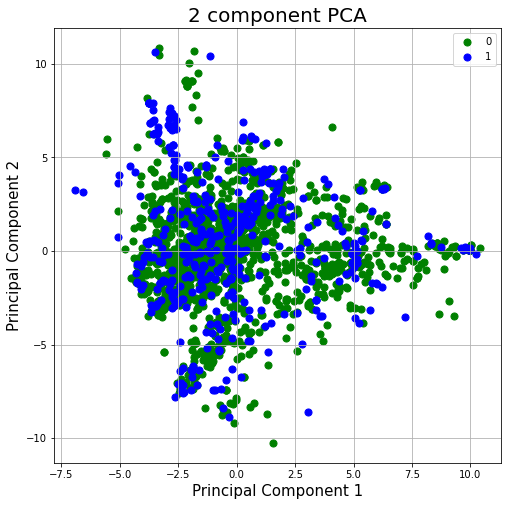

In [394]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1] # target values
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['day_night'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [376]:
# Kernel PCA
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, random_state=1)
x_kpca = kpca.fit_transform(x)

kpca_data = kpca.fit_transform(cases_q3.loc[:,cases_q3.columns != 'day_night'])

In [377]:
principalDf = pd.DataFrame(data = x_kpca,
                           columns = ['principal component 1', 'principal component 2'])

In [378]:
principalDf.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
finalDf = pd.concat([principalDf, y], axis=1)

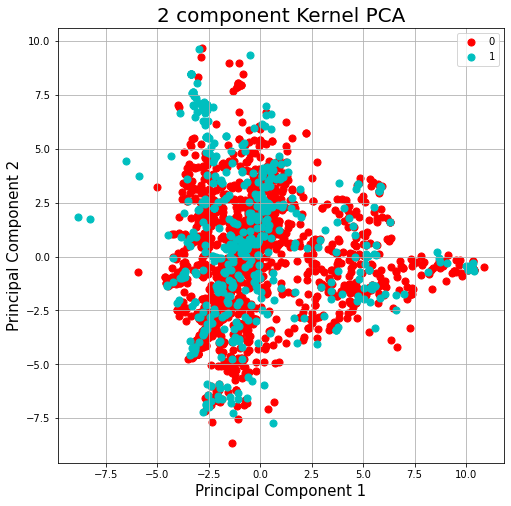

In [379]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component Kernel PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['day_night'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [380]:
# split the data into test and training sets, with 70% of samples being put into the training set
X_train, X_test, y_train, y_test = train_test_split(kpca_data, y, test_size=0.3, random_state=0)

In [381]:
# Logistic Regression after Kernel PCA
clf = LogisticRegression(penalty='l1', solver='liblinear')
clf.fit(X_train, y_train)
print('Coefficient of each feature:', clf.coef_)
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))
print('')

Coefficient of each feature: [[-0.00098783 -0.15368699]]
Training accuracy: 0.7628571428571429
Test accuracy: 0.765



In [386]:
# MDS
from sklearn.manifold import MDS
mds = MDS(n_components=2,random_state=0)
x_mds = mds.fit_transform(x)
mds_data = mds.fit_transform(cases_q3.loc[:,cases_q3.columns != 'day_night'])

In [383]:
principalDf = pd.DataFrame(data = x_mds,
                           columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis=1)

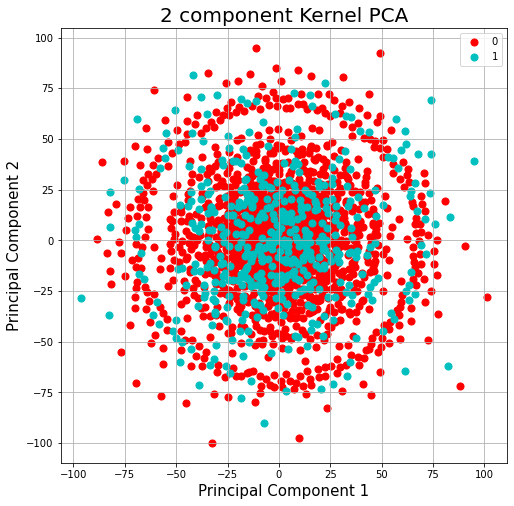

In [384]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component Kernel PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['day_night'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [387]:
# split the data into test and training sets, with 70% of samples being put into the training set
X_train, X_test, y_train, y_test = train_test_split(mds_data, y, test_size=0.3, random_state=0)

In [388]:
# Logistic Regression after MDS
clf = LogisticRegression(penalty='l1', solver='liblinear')
clf.fit(X_train, y_train)
print('Coefficient of each feature:', clf.coef_)
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))
print('')

Coefficient of each feature: [[ 0.014859   -0.02436606]]
Training accuracy: 0.7628571428571429
Test accuracy: 0.765



In [277]:
# Question 4
details = cases[cases['Category']=='Parking Enforcement']['Request Details']

In [283]:
details.str.split('-').str[1]

6                      Audi A7 
16                          NaN
29                 Honda Civic 
34                      Porsha 
41                       Prius 
                 ...           
1957             Honda compact 
1981             Ford / Escape 
1984     Chevrolet, Cheynne 10 
1996               VW, Passat  
1998           Chevrolet Astro 
Name: Request Details, Length: 115, dtype: object

In [ ]:
# separating by price levels
high = ['BMV','Mercedes','Audi','Tesla','Porsche','Ferrari','Land Rover',
        'Lamborghini','Maserati','Jaguar','Cadillac']
med = ['Acura','Lexus','Mini','Infiniti','Volvo']
low = ['Honda','Kia','Toyota','Hyundai','Ford','Nissan','Chevrolet',
       'Volkswagon','VW','Jeep','Mazda','Subaru']